<a href="https://colab.research.google.com/github/jorgefdzlara/iayaa-Equipo-17/blob/main/MNA_IAyAA_semana_8_Actividad_Equipo_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Esperón Carreón José Eduardo A01372413
* Fernández Lara Jorge A01793062
* Hernández Ramos Joel Orlando A00759664
* Romo Cárdenas Juan Carlos A00260430
* Torres Cantú David Alejandro A00818002


Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente liga del repositorio de la UCI: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 

El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En la página de la UCI encuentras mayor información sobre el problema.

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay   

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve


Parámetros de ejecución:
- Estandarizar Columnas Categóricas (ESTANDARIZAR_CATEGORICAS) *True: Si o False: No*
- Usar Sobremuestro (USAR_SOBREMUESTREO) *True: Si o False: No*
- Metodo de Sobremuestreo (METODO_SOBREMUESTREO) *1: SMOTEENN, 2: SMOTETomek*
- Metodo de Ajust (METODO_AJUSTE) *1: MinMaxScaler, 2: StandardScaler*

In [ ]:
ESTANDARIZAR_CATEGORICAS = True
USAR_SOBREMUESTREO = True
METODO_SOBREMUESTREO = 2
METODO_AJUSTE = 2

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.

In [ ]:
# Leyendo archivo directamente de UCI
archivo='https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
datos=pd.read_csv(archivo, delimiter=' ', header=None)

# Asignando nombres a las columnas
datos.columns=['A1', 'A2', 'A3', 'A4', 'A5',
               'A6', 'A7', 'A8', 'A9', 'A10',
               'A11', 'A12', 'A13', 'A14', 'A15']
datos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Descripción del conjunto de datos:

1. Los datos de crédito se originan en Quinlan.

2. **Título:** Australian Credit Approval.

3. **Fuentes:** (confidencial)

4. **Información relevante:** Este archivo concierne a aplicaciones para tarjetas de crédito. Todos los atributos de nombres y valores han sido cambiados a símbolos sin significado para proteger la confidencialidad de los datos.

> El conjunto de datos es interesante porque hay una buena combinación de atributos contínuos, nominales con pequeños números de valores y nominales con grandes números de valores. También hay valores faltantes.

5. **Número de Registros:** 690

6. **Número de Atributos:** 14 + Atributo de Clase

7. **Información de Atributos:** Hay 6 numéricos y 8 categóricos.

> Las etiquetas se han cambiado para la conveniencia de algoritmos estadísticos. Por ejemplo, el atributo 3 originalmente contenía 3 etiquetas p,g,gg y estas fueron cambiadas a etiquetas 1,2,3.

* A1: 0,1 Categórico (a,b)

* A2: Contínuo (Numérico)

* A3: Contínuo (Numérico)

* A4: 1,2,3 Categórico (p,g,gg)

* A5: 1,2,3,4,5,6,7,8,9,10,11,12,13,14 Categórico (ff,d,i,k,j,aa,m,c,w,e,q,r,cc,x)

* A6: 1,2,3,4,5,6,7,8,9 Categórico (ff,dd,j,bb,v,n,o,h,z)

* A7: Contínuo (Numérico)

* A8: 1,0 Categórico (t,f)

* A9: 1,0 Categórico (t,f)

* A10: Contínuo (Numérico)

* A11: 1,0 Categórico (t,f)

* A12: 1,2,3 Categórico (s,g,p)

* A13: Contínuo (Numérico)

* A14: Contínuo (Numérico)

* A15: 1,2 Atributo de clase (+,-)

> Valores de atributo faltantes: 37 casos (5%) tuvieron uno o más valores faltantes. Faltaron en los siguientes atributos:
> * A1: 12

> * A2: 12

> * A4: 6

> * A5: 6

> * A6: 9

> * A7: 9

> * A14: 13

> Estos valores fueron reemplazados por:

> * **Categóricos:** Moda del atributo.
> * **Contínuos:** Promedio del atributo.

9. Distribución de clases:
* +: 307 (44.5%) Clase 2

* -: 383 (55.5%) Clase 1
10. No hay matriz de costo.

In [ ]:
# Separando X´s y Y´s
X = datos[['A1', 'A2', 'A3', 'A4', 'A5','A6', 'A7', 'A8', 'A9', 'A10','A11', 'A12', 'A13', 'A14']].copy()
y = datos[['A15']].copy()

# Creando conjuntos de entrenamiento y prueba. Los conjuntos de prueba deben contener el 15% de la información
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
print ('Forma X ', X.shape,
       '\Forma Y ', y.shape,
       '\nForma X Entrenamiento ', X_train.shape,
       '\nForma X Prueba', X_test.shape,
       '\nForma Y Entrenamiento ', y_train.shape,
       '\nForma Y Prueba', y_test.shape)

Forma X  (690, 14) \Forma Y  (690, 1) 
Forma X Entrenamiento  (586, 14) 
Forma X Prueba (104, 14) 
Forma Y Entrenamiento  (586, 1) 
Forma Y Prueba (104, 1)


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [ ]:
datos.isna().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
dtype: bool

In [ ]:
datos.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


[]

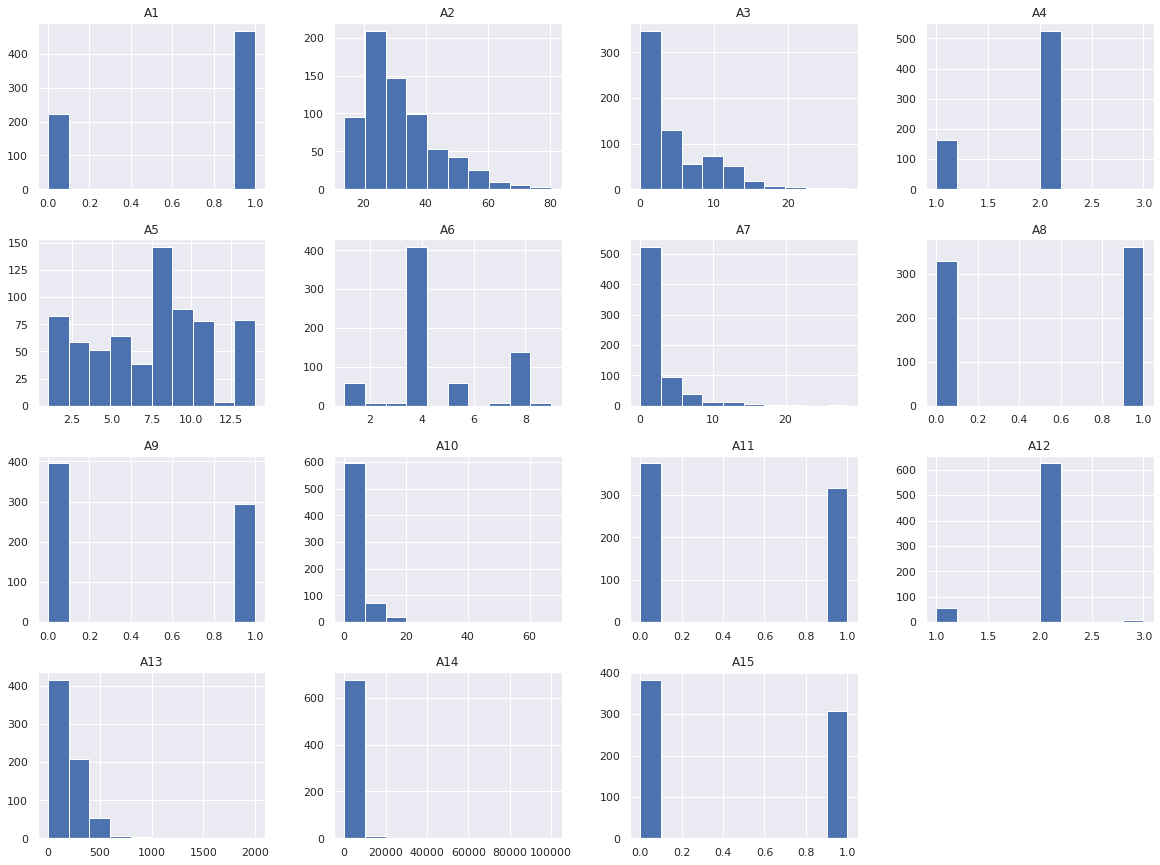

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
datos.hist()
plt.plot()

Basados en el análisis de datos inicial no parece ser necesario hacer imputaciones de datos. Ya qué, conforme la descripción de los valores nulos ya fueron imputados.

Sin embargo se harán transformaciones a los datos.

In [ ]:
# Seleccionando el ajustador para valore categóricos y numéricos
if (METODO_AJUSTE == 1):
  print('Usando ajustador MinMaxScaler...')
  Ajustador = MinMaxScaler()
else:
  print('Usando ajustador StandardScaler...')
  Ajustador = StandardScaler()

Usando ajustador StandardScaler...


- Columnas Categóricas: Se usará codificación One-Hot

In [ ]:
columnas_categoricas = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
pipeline_categoricas = Pipeline(
    steps = [('imputa-moda', SimpleImputer(strategy = 'most_frequent')),
             ('one-hot-encoding', OneHotEncoder(handle_unknown = 'ignore'))])

- Columnas Numéricas: Se usará MinMaxScaler o StandardScaler dependiendo del valor del paramétro METODO_AJUSTE

In [ ]:
columnas_numericas = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']
pipeline_numericas = Pipeline(
    steps = [('imputa-media', SimpleImputer(strategy = 'mean')),
             ('standarizacion', Ajustador)])

In [ ]:
# Sólo se ajustan variables numéricas para mantener consistencia de columnas derivadas entre
# los datos de prueba y los datos de entrenamiento.
# Si por otro lado se usa StandardScaler en todos los datos el modelo procesa más rapido
# Pero empieza a ser más precavido (beneficia recall)

if (ESTANDARIZAR_CATEGORICAS):
  print('Ajustando columnas categóricas y numéricas...')
  transformador_columnas = ColumnTransformer(
      transformers = [('transforma-categoricas', pipeline_categoricas, columnas_categoricas),
                      ('transforma-numericas', pipeline_numericas, columnas_numericas)],
                      remainder = 'passthrough'
                      )
else:
  print('Ajustando columnas numéricas...')
  transformador_columnas = ColumnTransformer(
      transformers = [('transforma-numericas', pipeline_numericas, columnas_numericas)],
                      remainder = 'passthrough'
                      )


Ajustando columnas categóricas y numéricas...


In [ ]:
# Preparando ajustadores con datos de entrenamiento
Xt_train_transform = transformador_columnas.fit(X_train)

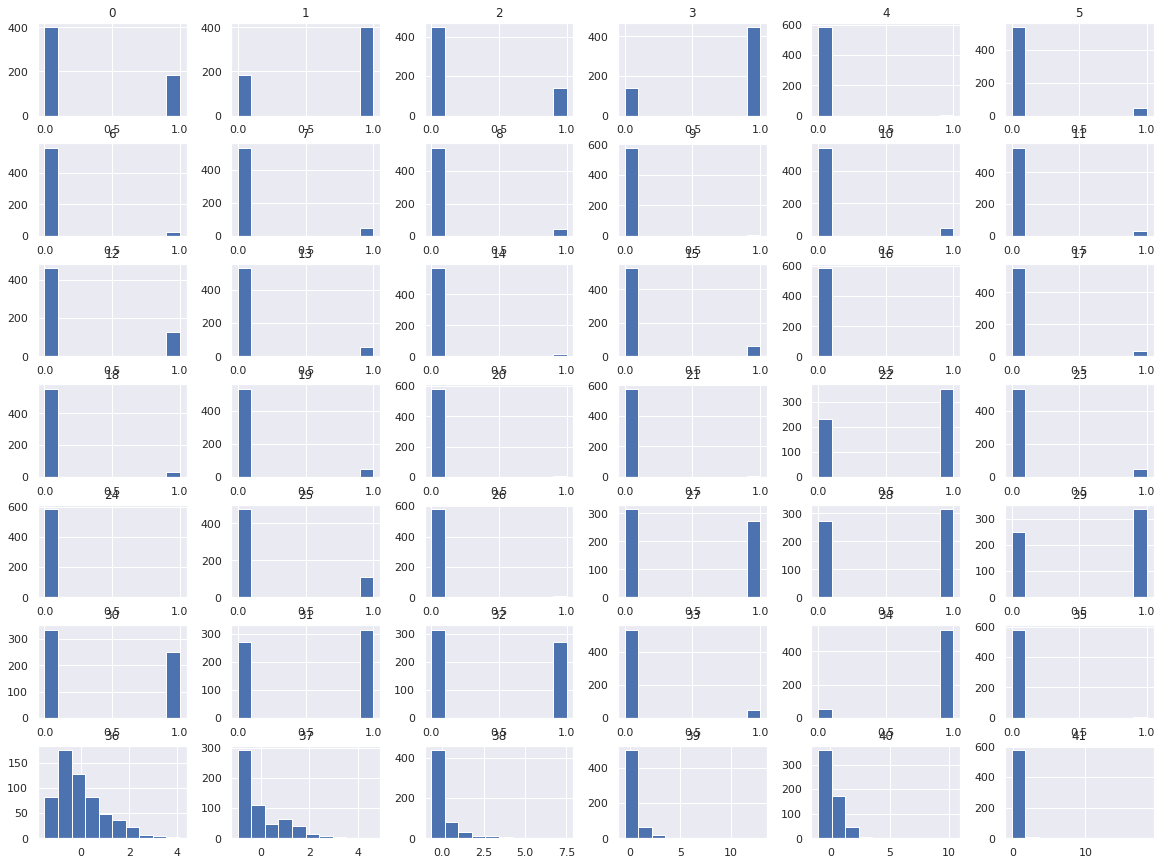

In [ ]:
# Ajustando datos de entrenamiento
Xt_train = Xt_train_transform.transform(X_train)

sns.set(rc={'figure.figsize':(20,15)})
pd.DataFrame(Xt_train).hist()
plt.show()

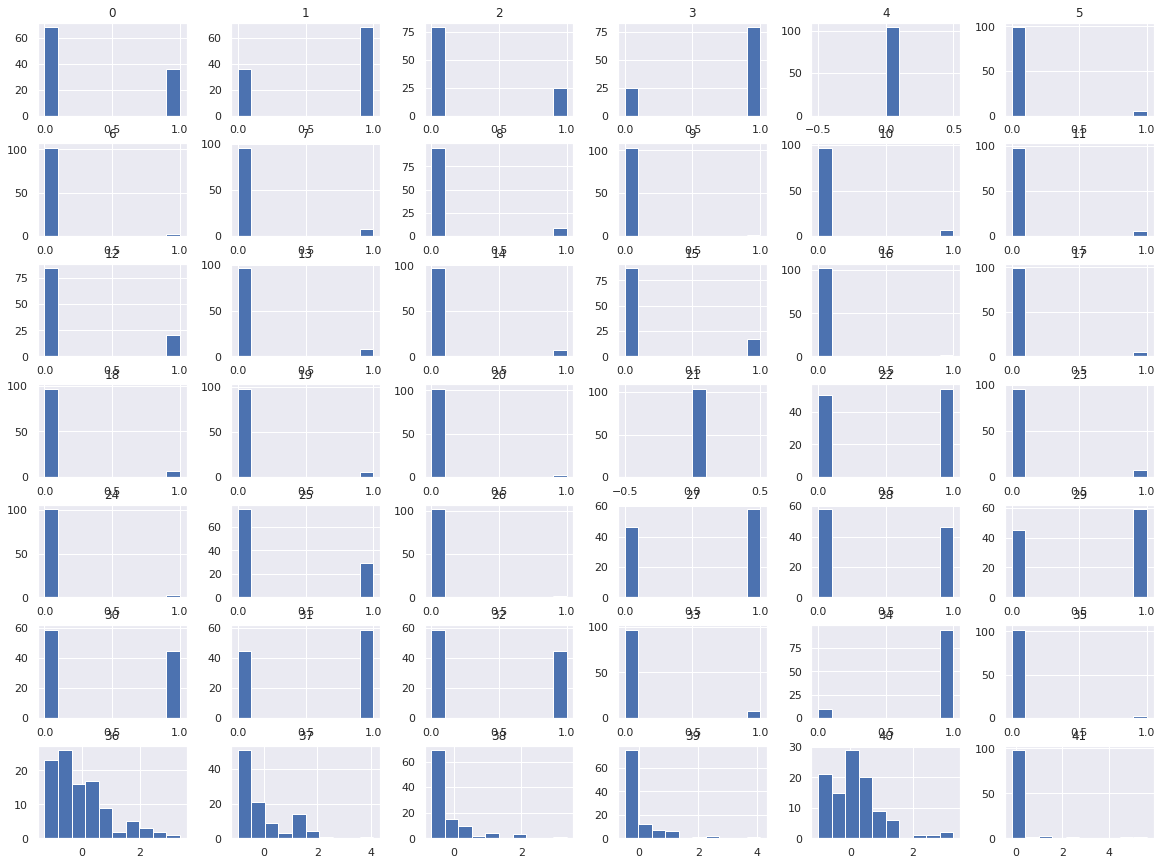

In [ ]:
# Ajustando datos de prueba
Xt_test = Xt_train_transform.transform(X_test)

sns.set(rc={'figure.figsize':(20,15)})
pd.DataFrame(Xt_test).hist()
plt.show()

#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

In [ ]:
# Funciones para evaluacion de eficiencia/desempeño
# Se agregó protección para division por 0 (cero). Se regresa 0 (cero) si el divisor es 0 (cero)
# vn = matriz_confusion[0,0]
# fp = matriz_confusion[0,1]
# fn = matriz_confusion[1,0]
# vp = matriz_confusion[1,1]
# accuracy = (vp + vn) / (vp + vn + fp + fn)
# precision = vp / (vp + fp)
# specificity = vn / (vn + fp)
# recall = vp / (vp + fn)
# f1-score = 2*vp / (2*vp + fp + fn)

def mi_accuracy(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((matriz_confusion[0, 0] +
         matriz_confusion[0, 1] +
         matriz_confusion[1, 0] +
         matriz_confusion[1, 1]) > 0):
        return ((matriz_confusion[1, 1] + matriz_confusion[0, 0]) /
                (matriz_confusion[0, 0] + matriz_confusion[0, 1] +
                 matriz_confusion[1, 0] + matriz_confusion[1, 1]))
    else:
        return 0

def mi_precision(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((matriz_confusion[1, 1] + matriz_confusion[0, 1]) > 0):
        return (matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[0, 1]))
    else:
        return 0

def mi_specificity(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((matriz_confusion[0, 0] + matriz_confusion[0, 1]) > 0):
        return (matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1]))
    else:
        return 0

def mi_recall(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((matriz_confusion[1, 1] + matriz_confusion[1, 0]) > 0):
        return (matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[1, 0]))
    else:
        return 0

def mi_f1_score(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((2 * matriz_confusion[1, 1] + matriz_confusion[0, 1] + matriz_confusion[1, 0]) > 0):
        return ((2 * matriz_confusion[1, 1]) / 
                (2 * matriz_confusion[1, 1] + matriz_confusion[0, 1] + matriz_confusion[1, 0]))
    else:
        return 0

def mi_fp_rate(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    if ((matriz_confusion[0, 0] + matriz_confusion[0, 1]) > 0):
        return (matriz_confusion[0, 1] / (matriz_confusion[0, 0] + matriz_confusion[0, 1]))
    else:
        return 0

def mi_gmean(y_real, y_pred):
    matriz_confusion = confusion_matrix(y_real, y_pred)
    s = 0
    if ((matriz_confusion[0, 0] + matriz_confusion[0, 1]) > 0):
        s = (matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1]))
    r = 0
    if ((matriz_confusion[1, 1] + matriz_confusion[1, 0]) > 0):
        r = (matriz_confusion[1, 1] / (matriz_confusion[1, 1] + matriz_confusion[1, 0]))    
    return np.sqrt(s * r)


In [ ]:
# Función para graficar matriz de confusión
def mi_matriz_confusion(y_real, y_pred):

  matriz_confusion = confusion_matrix(y_real, y_pred)

  texto = ['Verdaderos Negativos', 'Falsos Positivos', 'Falsos Negativos', 'Verdaderos Positivos']
  abreviado = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in matriz_confusion.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in matriz_confusion.flatten() / np.sum(matriz_confusion)]

  etiquetas = [f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(texto, abreviado, frecuencia, porcentaje)]
  etiquetas = np.asarray(etiquetas).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(matriz_confusion, annot=etiquetas, fmt='', cmap='Spectral', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

Desempeño para los datos de entrenamiento.
Precision: 0.4382
Recall:    0.4215
f1-score:  0.4297


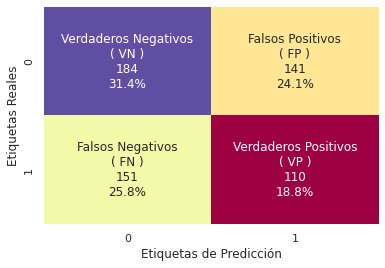

In [ ]:
# Inicializando un clasificador Dummy con estrategia "stratified"
modelo_dummy = DummyClassifier(strategy = 'stratified', random_state = 3)

# Entrenando clasificador dummy con el conjunto de entrenamiento
modelo_dummy.fit(X_train, np.ravel(y_train))

# Obteniendo predicciones con el conjunto de entrenamiento
y_hat_train = modelo_dummy.predict(X_train)

# Calculando resultados de desempeño
base_recall_train = mi_recall(y_train, y_hat_train)
base_precision_train = mi_precision(y_train, y_hat_train)
base_f1_score_train = mi_f1_score(y_train, y_hat_train)

print('Desempeño para los datos de entrenamiento.\nPrecision: %.4f\nRecall:    %.4f\nf1-score:  %.4f' %
      (base_precision_train, base_recall_train, base_f1_score_train))

# Graficando matriz de confusión
mi_matriz_confusion(y_train, y_hat_train)


Desempeño para los datos de prueba.
Precision: 0.4382
Recall:    0.4215
f1-score:  0.4297


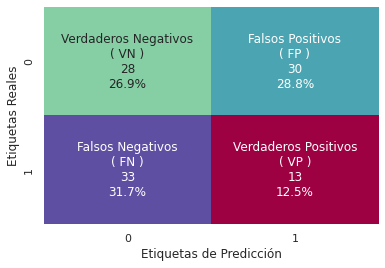

In [ ]:
# Obteniendo predicciones con el conjunto de pruebas
y_hat_test = modelo_dummy.predict(X_test)

# Calculando resultados de desempeño
base_recall_test = mi_recall(y_test, y_hat_test)
base_precision_test = mi_precision(y_test, y_hat_test)
base_f1_score_test = mi_f1_score(y_test, y_hat_test)

print('Desempeño para los datos de prueba.\nPrecision: %.4f\nRecall:    %.4f\nf1-score:  %.4f' %
      (base_precision_train, base_recall_train, base_f1_score_train))

# Graficando matriz de confusión
mi_matriz_confusion(y_test, y_hat_test)

**¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?**

La función Dummy Classifier de Scikit-Learn hace predicciones basadas únicamente en los valores de salida o “y”.

Como los resultados “y” disponibles no tienen una distribución normal no era recomendable usar la estrategia “uniform”.

Por otro lado, los datos “y” disponibles también muestran un desbalance del 11% y una tendencia hacia la clase negativa, y las estrategias “most_frequent” y “prior” solo harían predicciones negativas.

Finalmente es el simple hecho de que los valores de “y” están desbalanceados y con una ligera tendencia hacia la clase negativa lo que justifica el uso de la estrategia “stratified” para generar predicciones con una distribución idéntica a la de los datos “y” (scikit-learn developers, 2022).

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.

In [ ]:
# Preparando modelo svm.SVC, diccionario para optimización, arreglo de metricas,
# K-fold estratificado para asegurar una distribución consistente de casos con
# clase negativa y positiva y sobremuestreo cuando es requerido
modelo_svm = svm.SVC(random_state = 3)

# Seleccionando modelo de sobremuestreo y preparando datos con muestreo si
# es requerido
if (USAR_SOBREMUESTREO):
  if (METODO_SOBREMUESTREO == 1):
    print('SMOTEENN fue seleccionado como metodo de sobremuestro...')
    modelo_sobremuestreo = SMOTEENN(random_state=3)
  else:
    print('SMOTETomek fue seleccionado como metodo de sobremuestro...')
    modelo_sobremuestreo = SMOTETomek(random_state=3)

  print('Usando metodo de sobremuestro en el conjunto de entrenamiento...')
  Xt_sm_train, yt_sm_train = modelo_sobremuestreo.fit_resample(Xt_train, np.ravel(y_train))

diccionario_malla = {'C' : [0.0001, 0.001, 0.01, 0.1, 1.],
                     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                     'gamma' : [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.]
                    }
metricas = {'accuracy' : make_scorer(mi_accuracy),
            'precision' : make_scorer(mi_precision),
            'recall' : make_scorer(mi_recall),
            'f1score' : make_scorer(mi_f1_score)}

kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)

# Preparando malla de búsqueda con varias metricas y usando f1-score para refit
malla_SVC = GridSearchCV(estimator = modelo_svm,
                         param_grid = diccionario_malla,
                         cv = kfold,
                         refit = 'f1score',
                         scoring = metricas,
                         n_jobs = -1)

if (USAR_SOBREMUESTREO):
  # Usando conjunto de datos de entrenamiento ajustado con sobremuestreo
  print('Usando el conjunto de entrenamiento ajustado con sobremuestro para la malla de búsqueda...')
  malla_SVC.fit(Xt_sm_train, yt_sm_train)
else:
  # Usando conjunto de datos de entrenamiento ajustado
  print('Usando el conjunto de entrenamiento ajustado para la malla de búsqueda...')
  malla_SVC.fit(Xt_train, np.ravel(y_train))

print()
print('El mejor valor de desempeño obtenido con la mejor combinación:', malla_SVC.best_score_)
print('La mejor combinación de valores encontrados de los hiperparámetros:', malla_SVC.best_params_)
print('Métrica utilizada: f1_score a traves de la función ', malla_SVC.scoring)

print()
print('Desempeño promedio de los datos de validación.\nAccuracy:  %.4f\nPrecision: %.4f\nRecall:    %.4f\nf1-score:  %.4f' %
      (np.mean(malla_SVC.cv_results_['mean_test_accuracy']),
       np.mean(malla_SVC.cv_results_['mean_test_precision']),
       np.mean(malla_SVC.cv_results_['mean_test_recall']),
       np.mean(malla_SVC.cv_results_['mean_test_f1score'])))

print()
print('Desempeño máximo de los datos de validación.\nAccuracy:  %.4f\nPrecision: %.4f\nRecall:    %.4f\nf1-score:  %.4f' %
      (malla_SVC.cv_results_['mean_test_accuracy'].max(),
       malla_SVC.cv_results_['mean_test_precision'].max(),
       malla_SVC.cv_results_['mean_test_recall'].max(),
       malla_SVC.cv_results_['mean_test_f1score'].max()))


SMOTETomek fue seleccionado como metodo de sobremuestro...
Usando metodo de sobremuestro en el conjunto de entrenamiento...
Usando el conjunto de entrenamiento ajustado con sobremuestro para la malla de búsqueda...

El mejor valor de desempeño obtenido con la mejor combinación: 0.9059904862071773
La mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.0001, 'gamma': 1.0, 'kernel': 'poly'}
Métrica utilizada: f1_score a traves de la función  {'accuracy': make_scorer(mi_accuracy), 'precision': make_scorer(mi_precision), 'recall': make_scorer(mi_recall), 'f1score': make_scorer(mi_f1_score)}

Desempeño promedio de los datos de validación.
Accuracy:  0.7219
Precision: 0.8185
Recall:    0.5620
f1-score:  0.5772

Desempeño máximo de los datos de validación.
Accuracy:  0.9038
Precision: 1.0000
Recall:    0.9727
f1-score:  0.9060


#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.

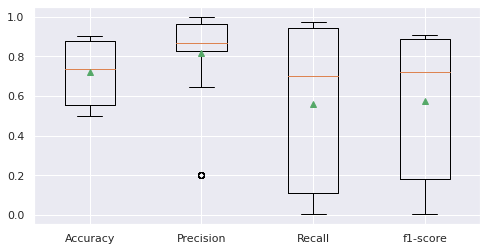

In [ ]:
# Graficando resultados de desempeño obtenidos de la malla de búsqueda ("cv_results_")
sns.set(rc={'figure.figsize':(8,4)})
metricas_obtenidas = list()
metricas_obtenidas.append(malla_SVC.cv_results_['mean_test_accuracy'])
metricas_obtenidas.append(malla_SVC.cv_results_['mean_test_precision'])
metricas_obtenidas.append(malla_SVC.cv_results_['mean_test_recall'])
metricas_obtenidas.append(malla_SVC.cv_results_['mean_test_f1score'])

plt.boxplot(metricas_obtenidas, labels=['Accuracy', 'Precision', 'Recall', 'f1-score'], showmeans=True)
plt.show()


**Conclusiones.**


Originalmente se observó que el modelo sin sobremuestreo producía resultados con mucha variabilidad para las métricas de precisión (precision), sensibilidad (recall) y f1-score. También se observó que el rendimiento promedio de estas métricas era muy bajo.

Después de usar  la técnica de sobremuestreo SMOTE-Tomek se observa que los diagramas de cajas y bigotes muestran una menor variabilidad para la métrica de exactitud (accuracy), y una variabilidad muy pequeña para la métrica precisión (precision).

Por lo que respecta a las métricas de sensibilidad (recall) y f1-score los promedios son más altos o mejores que los vistos para el modelo sin sobremuestreo SMOTE-Tomek.

En todas las métricas se observó que las medianas eran más grandes, o con tendencia hacia la parte alta de la caja. 

Se puede por lo tanto concluir que el uso de la técnica de sobremuestreo SMOTE-Tomek mejoró el desempeño de la máquina de vectores de soporte ya que esta técnica produce muestras balanceadas y con grupos de clases bien definidos (Batista, Prati, Bonard, 2004). 


#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.

In [ ]:
def mi_grafica_curva_aprendizaje(tamanios, resultados, validaciones, metrica):

    tamanios_promedio = np.mean(resultados, axis=1)
    tamanios_desvacion = np.std(resultados, axis=1)
    validaciones_promedio = np.mean(validaciones, axis=1)
    validaciones_desviacion = np.std(validaciones, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(tamanios, tamanios_promedio, color='blue', marker='o', markersize=5, label='Entrenamiento')
    plt.fill_between(tamanios,
                     tamanios_promedio + tamanios_desvacion,
                     tamanios_promedio - tamanios_desvacion,
                     alpha=0.1, color='blue')

    plt.plot(tamanios, validaciones_promedio, color='red', marker='+', markersize=5, linestyle='--', label='Validación')
    plt.fill_between(tamanios,
                     validaciones_promedio + validaciones_desviacion,
                     validaciones_promedio - validaciones_desviacion,
                     alpha=0.1,
                     color='red')

    plt.title('Curvas de aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(metrica)
    plt.grid(b=True)
    plt.legend(loc='lower left')
    plt.show()

In [ ]:
def mi_curva_aprendizaje(X_, y_, modelo, nombre_modelo, metricas, metrica_nombre):
  # Preparando paramétros para generar curvas de aprendizaje
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  tamanios_grupo_apendizaje = np.linspace(0.1, 1, num=40)

  # Ejecutando la curva de aprendizaje con una métrica
  tamanios, resultados, validaciones = learning_curve(estimator = modelo,    
                                                      X = X_,
                                                      y = np.ravel(y_),
                                                      cv = kfold,
                                                      train_sizes = tamanios_grupo_apendizaje,
                                                      random_state = 3,
                                                      scoring=metricas[metrica_nombre],
                                                      n_jobs = -1)

  # Graficando resultados de la curva de aprendizaje
  print('Curvas de aprendizaje del ' + nombre_modelo)
  mi_grafica_curva_aprendizaje(tamanios, resultados, validaciones, metrica_nombre)

In [ ]:
# svm.SVC:
#  kernel = 'poly' parece sobreentrenado
#  kernel = 'rbf' parece sobreentrenado
#  kernel = 'sigmoid' parece sobreentrenado
#  kernel = 'linear' parece OK
modelo_svm_optimo = svm.SVC(C = malla_SVC.best_params_['C'],
                            gamma = malla_SVC.best_params_['gamma'],
                            kernel = malla_SVC.best_params_['kernel'],
                            probability = True,
                            random_state = 3)
modelo_svm_optimo.fit(Xt_train, np.ravel(y_train))

SVC(C=0.0001, gamma=1.0, kernel='poly', probability=True, random_state=3)

In [ ]:
if (USAR_SOBREMUESTREO):
  Xt_curvas = Xt_sm_train.copy()
  yt_curvas = yt_sm_train.copy()
else:
  Xt_curvas = Xt_train.copy()
  yt_curvas = np.ravel(y_train).copy()

Curvas de aprendizaje del Vector de Soporte


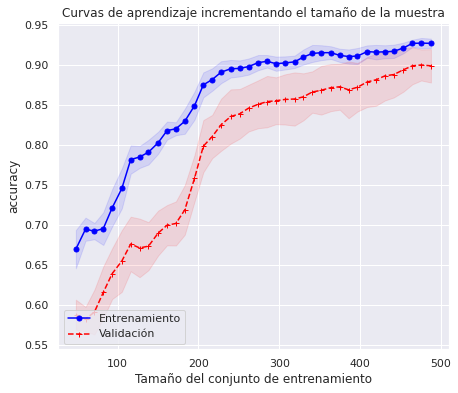

In [ ]:
mi_curva_aprendizaje(Xt_curvas, yt_curvas, modelo_svm_optimo, 'Vector de Soporte', metricas, 'accuracy')

Curvas de aprendizaje del Vector de Soporte


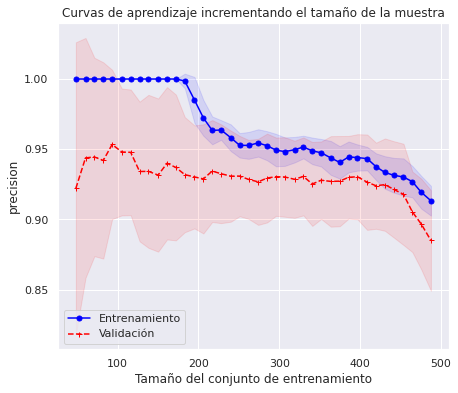

In [ ]:
mi_curva_aprendizaje(Xt_curvas, yt_curvas, modelo_svm_optimo, 'Vector de Soporte', metricas, 'precision')

Curvas de aprendizaje del Vector de Soporte


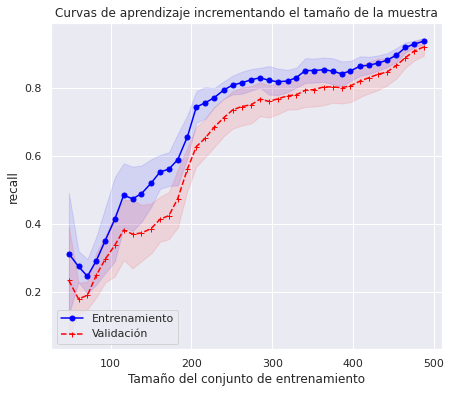

In [ ]:
mi_curva_aprendizaje(Xt_curvas, yt_curvas, modelo_svm_optimo, 'Vector de Soporte', metricas, 'recall')

Curvas de aprendizaje del Vector de Soporte


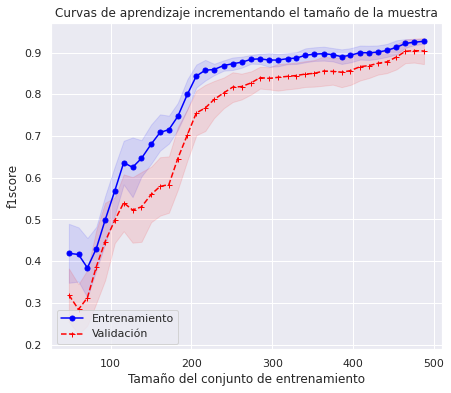

In [ ]:
mi_curva_aprendizaje(Xt_curvas, yt_curvas, modelo_svm_optimo, 'Vector de Soporte', metricas, 'f1score')

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.

Proporcion TP = 0.804, Proporcion FP = 0.08621


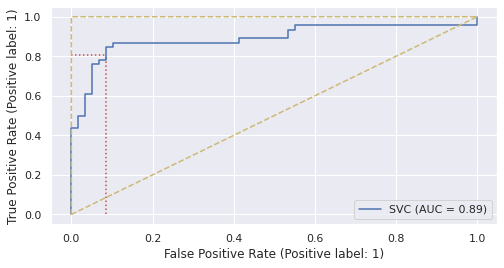

In [ ]:
# Calculando proporciones de positivos verdaderos y positivos falsos
y_hat_test = modelo_svm_optimo.predict(Xt_test)
proporcion_pv = mi_recall(y_test, y_hat_test)
proporcion_pf = mi_fp_rate(y_test, y_hat_test)

print('Proporcion TP = %.3f, Proporcion FP = %.5f' %
      (proporcion_pv, proporcion_pf))

# Graficando la curva ROC
RocCurveDisplay.from_estimator(modelo_svm_optimo, Xt_test, np.ravel(y_test))

# Marcando línea de desempeño de un modelo aleatorio y el mejor punto en la curva
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(proporcion_pv, 0, proporcion_pf, colors='r', linestyles='dotted')
plt.vlines(proporcion_pf, 0, proporcion_pv, colors='r', linestyles='dotted')

plt.show()

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.

Código modificado (Brownlee, 2020). 

In [ ]:
# Funcion para convertir resultados probabilísticos a una clase binaria
def mi_obten_clase(y_probabilistica, umbral):
    return (y_probabilistica > umbral).astype('int')


In [ ]:
# Crear rango de umbrales a usar en la optimizacion de f1-score para el modelo svm.SVC óptimo
rango_umbrales = np.arange(0.001, 1, 0.01)

# Calculando probabilidades de predicciones
print('Clases predicidas por el modelo: ', modelo_svm_optimo.classes_)
y_hat_probabilistica = modelo_svm_optimo.predict_proba(Xt_test)


# Calculando resultados de f1-score con diferentes umbrales y seleccionando la segunda clase (VP)
resultados_f1 = [mi_f1_score(np.ravel(y_test), np.ravel(mi_obten_clase(y_hat_probabilistica, umbral)[:,1]))
                 for umbral in rango_umbrales]

# Seleccionando el mejor resultado de f1-score
mejor_indice_f1_score = np.argmax(resultados_f1)

print('Mejor umbral = %.3f, f1-score = %.5f' %
      (rango_umbrales[mejor_indice_f1_score], resultados_f1[mejor_indice_f1_score]))


Clases predicidas por el modelo:  [0 1]
Mejor umbral = 0.211, f1-score = 0.86957


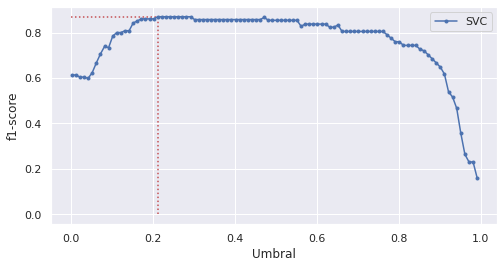

In [ ]:
# Graficando la curva f1-score para el modelo svm.SVC optimo
plt.plot(rango_umbrales, resultados_f1, marker='.', label='SVC')

# Marcando punto de mejor desempeño
plt.hlines(resultados_f1[mejor_indice_f1_score], 0, rango_umbrales[mejor_indice_f1_score], colors='r', linestyles='dotted')
plt.vlines(rango_umbrales[mejor_indice_f1_score], 0, resultados_f1[mejor_indice_f1_score], colors='r', linestyles='dotted')

plt.xlabel('Umbral')
plt.ylabel('f1-score')
plt.legend()

plt.show()

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g- mean.

Código modificado (Brownlee, 2020). 

In [ ]:
# Obteniendo los resultados de la curva ROC para el modelo svm.SVC óptimo
prop_falsos_positivos, prop_verdaderos_positivos, umbrales = roc_curve(np.ravel(y_test), np.ravel(y_hat_probabilistica[:,1]))

# Calculando g-mean por cada umbral
resultados_gmean = np.sqrt(prop_verdaderos_positivos * (1-prop_falsos_positivos))

# Seleccionando el mejor resultado de g-mean
mejor_indice_gmean = np.argmax(resultados_gmean)

print('Mejor umbral = %f, G-Mean = %.3f' %
      (umbrales[mejor_indice_gmean], resultados_gmean[mejor_indice_gmean]))

Mejor umbral = 0.299253, G-Mean = 0.883


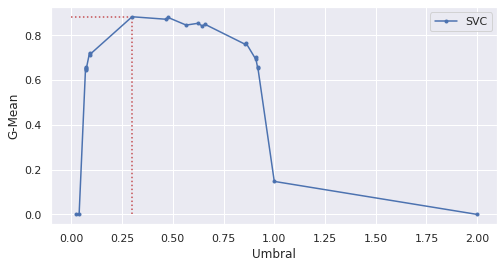

In [ ]:
# Graficando la curva G-Mean para el modelo svm.SVC optimo
plt.plot(umbrales, resultados_gmean, marker='.', label='SVC')

# Marcando punto de mejor desempeño
plt.hlines(resultados_gmean[mejor_indice_gmean], 0, umbrales[mejor_indice_gmean], colors='r', linestyles='dotted')
plt.vlines(umbrales[mejor_indice_gmean], 0, resultados_gmean[mejor_indice_gmean], colors='r', linestyles='dotted')

plt.xlabel('Umbral')
plt.ylabel('G-Mean')
plt.legend()

plt.show()

#**Ejercicio-10.**

Incluye tus conclusiones finales de la actividad.

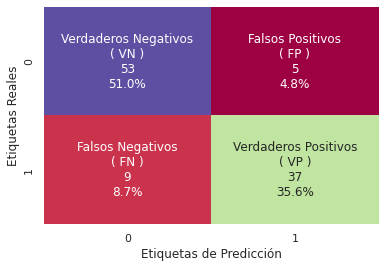

In [ ]:
# Graficando matriz de confusión
mi_matriz_confusion(y_test, y_hat_test)

**Conclusiones Finales.**

En esta actividad hemos probado diferentes acercamientos en el preprocesamiento de nuestros datos para obtener un modelo con mejor desempeño en distintas métricas. En este sentido, principalmente, variamos las técnicas de escalamiento realizadas a las variables categóricas y variables numéricas, así como la técnica de sobre muestreo aplicada. Como se indicó anteriormente el uso de la técnica SMOTE-Tomek mejoró el desempeño del modelo basado en la máquina de vector de soporte (SVM) ya que, aunque no pareciera mucho, un desbalance del 11% en las clases de nuestra variable de salida probó ser significativo en un conjunto de datos relativamente pequeño afectando negativamente el desempeño del modelo original. Cabe mencionar que, adicional a SMOTE-Tomek, nuestras variables categóricas fueron tratadas con One-Hot encoder y nuestras variables numéricas escaladas con Standard Scaler.

Como podemos observar en nuestras gráficas de desempeño, el modelo tiene un comportamiento bastante positivo en la mayoría de las métricas. Por ejemplo, el desempeño en las gráficas de accuracy, recall y f1-score está por arriba del 90% con una variación muy mínima entre los datos de entrenamiento y los de validación. Esto quiere decir, que nuestro modelo es bueno prediciendo de manera general (accuracy), clasificando y prediciendo verdaderos positivos (recall y f1-score).

Finalmente es importante recalcar lo siguiente:
- Las orientación y nivel de congruencia en las curvas de aprendizaje tienden hacia la alza (mejora) y son cada vez más congruentes, respectivamente. Esto indica que el modelo mejora con el incremento del número de muestras
- La curva ROC indica que el modelo clasificará las muestras correctamente en el 89% de los casos
- Los valores óptimos de f1-score y G-mean, 0.869 y 0.883 respectivamente, también confirman que el modelo será menos estricto en lo que respecta a falsos negativos y falsos positivos, con una tendencia a hacer predicciones más favorables para el solicitante (falsos negativos), sin ser esta excesiva.


###**Referencias.**

scikit-learn developer, (2022), "*sklearn.dummy.DummyClassifier*", scikit-learn, Recuperado 10 Noviembre, 2022, https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

imbalanced-learn developers, (2022), "*SMOTETomek*", scikit-learn, Recuperado 10 Noviembre, 2022, https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html

Batista, G. E., Prati, R. C., Monard, M. C. (2004). A study of the behavior of several methods for balancing machine learning training data. *ACM SIGKDD Explorations Newsletter*, 6(1), 20–29. https://doi.org/10.1145/1007730.1007735 

Brownlee, J., (5 Enero, 2021), "*A Gentle Introduction to Threshold-Moving for Imbalanced Classification*", Machime Learning Mastery, https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

Czakon, J., (21 Julio, 2022), "*F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose?*", Neptune.ai Blog, https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc|

Shafi, A. (2022). "*How to learn the definitions of precision and recall (for good)*", Towards Data Science, Recuperado 7 Noviembre, 2022, https://towardsdatascience.com/precision-and-recall-88a3776c8007 


###**Fin de la Actividad de la semana 8.**